# Air Quality and Pollution Assessment
This dataset focuses on air quality assessment across various regions. The dataset contains 5000 samples and captures critical environmental and demographic factors that influence pollution levels.

### Key Features:

- Temperature (°C): Average temperature of the region.
- Humidity (%): Relative humidity recorded in the region.
- PM2.5 Concentration (µg/m³): Fine particulate matter levels.
- PM10 Concentration (µg/m³): Coarse particulate matter levels.
- NO2 Concentration (ppb): Nitrogen dioxide levels.
- SO2 Concentration (ppb): Sulfur dioxide levels.
- CO Concentration (ppm): Carbon monoxide levels.
- Proximity to Industrial Areas (km): Distance to the nearest industrial zone.
- Population Density (people/km²): Number of people per square kilometer in the region.

### Target Variable: Air Quality Levels

- Good: Clean air with low pollution levels.
- Moderate: Acceptable air quality but with some pollutants present.
- Poor: Noticeable pollution that may cause health issues for sensitive groups.
- Hazardous: Highly polluted air posing serious health risks to the population.

Download dataset form [Kaggle](https://www.kaggle.com/datasets/mujtabamatin/air-quality-and-pollution-assessment).

In [1]:
# Importing necessary libraries for data manipulation, visualization, and machine learning
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv('pollution_dataset.csv')

# Display the first few rows of the dataset
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [3]:
# Display the last few rows of the dataset
df.tail()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good
4999,24.1,77.9,81.7,94.3,23.2,10.5,1.38,8.3,461,Moderate


In [4]:
# Rename columns for better readability
df.rename(columns={
    'Proximity_to_Industrial_Areas': 'P_to_I_areas',
    'Population_Density': 'P_Density'
}, inplace=True)

In [5]:
# Display dataset information including column types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Temperature   5000 non-null   float64
 1   Humidity      5000 non-null   float64
 2   PM2.5         5000 non-null   float64
 3   PM10          5000 non-null   float64
 4   NO2           5000 non-null   float64
 5   SO2           5000 non-null   float64
 6   CO            5000 non-null   float64
 7   P_to_I_areas  5000 non-null   float64
 8   P_Density     5000 non-null   int64  
 9   Air Quality   5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [6]:
# Check for missing values in the dataset
df.isnull().sum()

Temperature     0
Humidity        0
PM2.5           0
PM10            0
NO2             0
SO2             0
CO              0
P_to_I_areas    0
P_Density       0
Air Quality     0
dtype: int64

In [7]:
# Generate basic statistical descriptions of the dataset
df.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,P_to_I_areas,P_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


In [8]:
# Count the unique values in the target column ('Air Quality')
df['Air Quality'].value_counts()

Air Quality
Good         2000
Moderate     1500
Poor         1000
Hazardous     500
Name: count, dtype: int64

<Axes: >

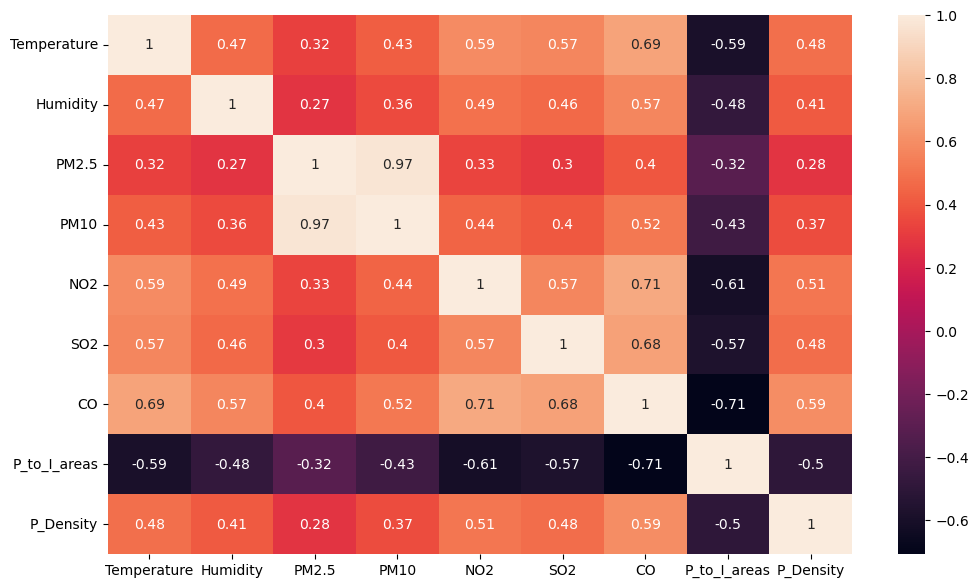

In [9]:
# Correlation heatmap for numerical features
plt.figure(figsize=(12, 7))
sns.heatmap(df.corr(numeric_only=True), annot=True)

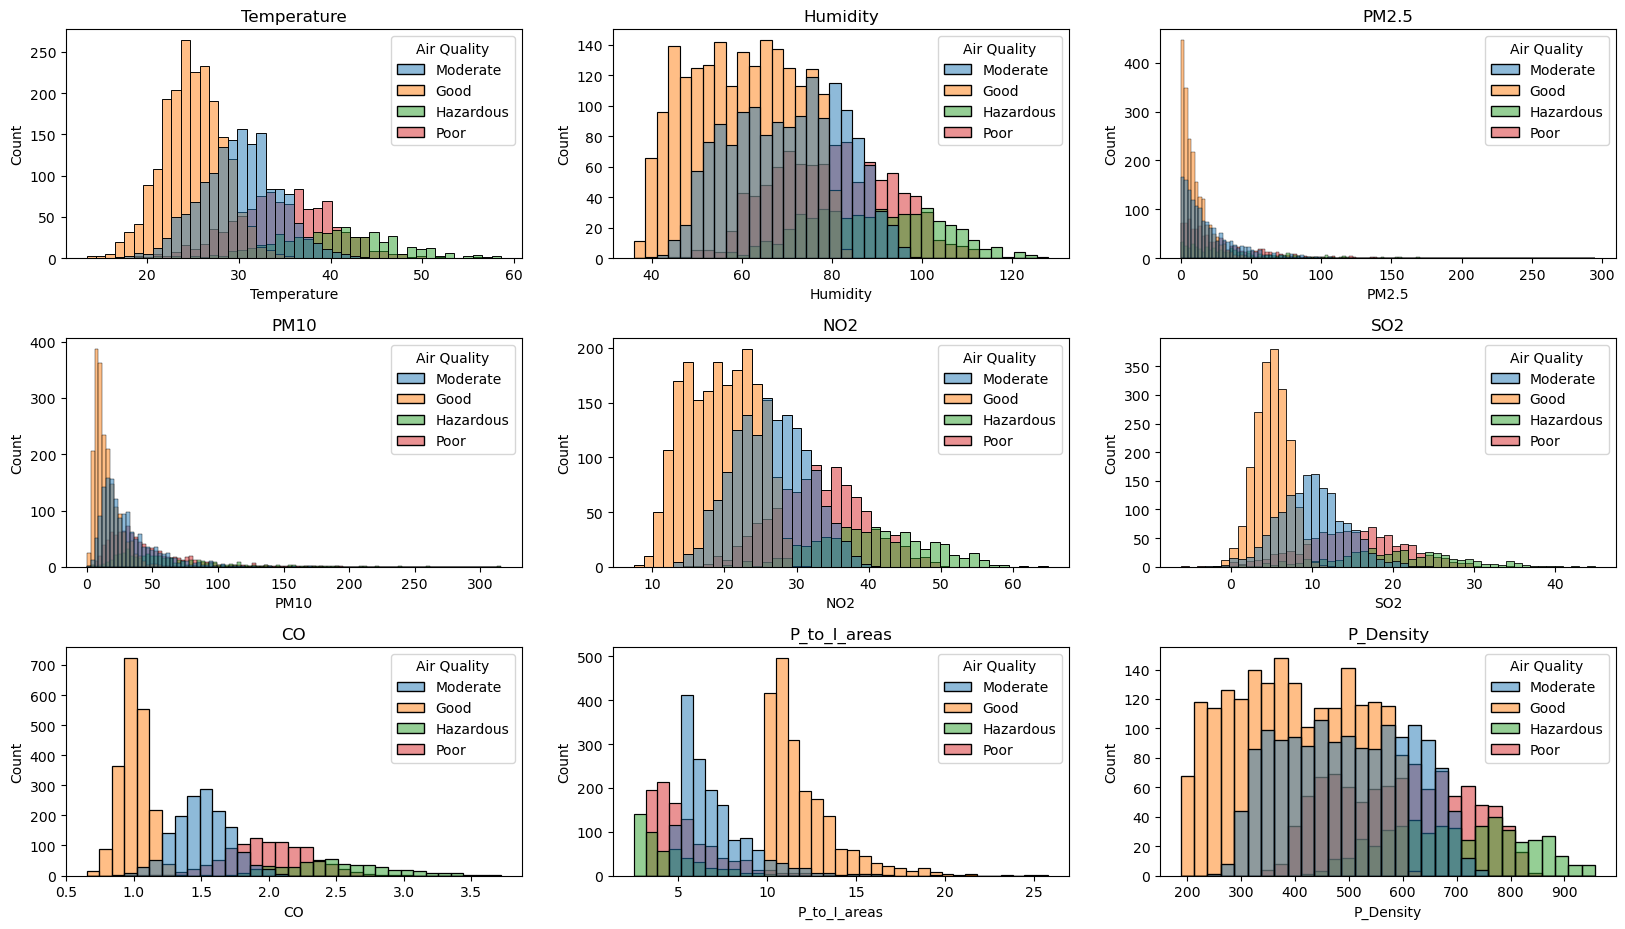

In [10]:
# Histograms for each feature grouped by 'Air Quality'
plt.figure(figsize=(20, 15))
for i, col in enumerate(df.columns[:-1], 1):  # Exclude the target column
    plt.subplot(4, 3, i)
    sns.histplot(x=df[col], hue=df['Air Quality'], multiple='layer')
    plt.subplots_adjust(hspace=0.35)
    plt.title(col)
    plt.plot()

In [11]:
# Encode the target variable 'Air Quality' using Label Encoding
label_encoder = LabelEncoder()
df['Air Quality'] = label_encoder.fit_transform(df['Air Quality'])

In [12]:
# Display the transformed target column
df['Air Quality'].value_counts()

Air Quality
0    2000
2    1500
3    1000
1     500
Name: count, dtype: int64

In [13]:
# Split the data into features (X) and target (y)
X = df.drop(['Air Quality'], axis=1)
y = df['Air Quality']

In [70]:
X.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,P_to_I_areas,P_Density
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303


In [71]:
y

0       2
1       2
2       2
3       0
4       0
       ..
4995    1
4996    2
4997    2
4998    0
4999    2
Name: Air Quality, Length: 5000, dtype: int32

In [14]:
# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
# Standardize the features for better model performance
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [16]:
# Display the first few rows of standardized training and testing sets
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8
0,1.324363,0.797230,1.425100,1.372436,1.483808,-0.274300,0.909533,-1.330699,0.287995
1,-1.183461,0.803518,-0.786993,-0.762409,0.676809,0.205320,0.173627,-0.587933,0.085848
2,0.645775,0.470245,-0.569734,-0.840687,-0.096564,-0.169383,0.376001,-0.092755,0.007598
3,-0.932678,-0.315776,-0.423577,-0.588063,-1.329479,-0.768907,-0.985426,0.622501,-1.094429
4,0.660527,0.702908,0.050442,0.048832,0.351768,-1.218550,-0.580678,-0.422874,0.085848


In [75]:
pd.DataFrame(X_test).head()

,0,1,2,3,4,5,6,7,8
0,0.173714,0.199854,2.061077,2.066260,3.097805,1.059642,1.903007,-1.605797,1.670419
1,-0.903175,-0.089402,-0.783042,-0.787315,-0.623355,-1.143610,-0.635871,0.567481,-1.720432
2,-0.696648,0.526839,-0.652687,-0.854919,-0.578522,-0.139407,-0.194327,0.457442,0.287995
3,0.085203,1.998270,-0.502581,-0.164652,1.696766,2.408572,1.479861,-1.000581,1.735627
4,-0.534377,-1.013762,-0.328773,-0.548924,-0.690605,-0.708955,-0.948631,1.172698,-0.814031


In [17]:
# Function to fit and evaluate multiple models
def fit_models(models: dict) -> None:
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train)  # Train the model
        
        # Predictions for training and testing sets
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Evaluate performance on training set
        model_train_accuracy = accuracy_score(y_train, y_train_pred)
        c_matrix_train = confusion_matrix(y_train, y_train_pred)
        
        # Evaluate performance on testing set
        model_test_accuracy = accuracy_score(y_test, y_test_pred)
        c_matrix_test = confusion_matrix(y_test, y_test_pred)
        
        # Display model performance metrics
        print(list(models.keys())[i])
        print("Model Performance for Training Set")
        print(f"- Accuracy: {model_train_accuracy}")
        print(f"- Confusion Matrix:\n{c_matrix_train}")
        print("-" * 40)
        print("Model Performance for Testing Set")
        print(f"- Accuracy: {model_test_accuracy}")
        print(f"- Confusion Matrix:\n{c_matrix_test}")
        print("#" * 40)
        print("\n")

In [19]:
# Define models for evaluation
models = {
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "AdaBoost Classifier" : AdaBoostClassifier(),
    "XgBoost Classifier" : XGBClassifier(),
}

In [20]:
# Fit and evaluate models
fit_models(models=models)

Decision Tree Classifier
Model Performance for Training Set
- Accuracy: 1.0
- Confusion Matrix:
[[1382    0    0    0]
 [   0  352    0    0]
 [   0    0 1048    0]
 [   0    0    0  718]]
----------------------------------------
Model Performance for Testing Set
- Accuracy: 0.91
- Confusion Matrix:
[[615   0   3   0]
 [  0 120   2  26]
 [  4   1 406  41]
 [  0  32  26 224]]
########################################


Random Forest Classifier
Model Performance for Training Set
- Accuracy: 1.0
- Confusion Matrix:
[[1382    0    0    0]
 [   0  352    0    0]
 [   0    0 1048    0]
 [   0    0    0  718]]
----------------------------------------
Model Performance for Testing Set
- Accuracy: 0.9506666666666667
- Confusion Matrix:
[[618   0   0   0]
 [  0 123   1  24]
 [  0   0 434  18]
 [  0  15  16 251]]
########################################


Gradient Boosting Classifier
Model Performance for Training Set
- Accuracy: 0.9914285714285714
- Confusion Matrix:
[[1382    0    0    0]
 [   0

In [21]:
# Define hyperparameter grids for RandomizedSearchCV

random_forest_params = {
    "max_depth": [5, 8, 15, None, 10],
    "max_features": [5, 7, 'auto', 8],
    'min_samples_split': [2, 8, 15, 20],
    'n_estimators': [100, 200, 500, 1000]
}

adaboost_paramns = {
    'n_estimators': [10,20,25,40,50,60,70],
    'learning_rate': [1.0,0.1,0.01,0.001],
    'algorithm': ['SAMME', 'SAMME.R']
}

gradient_boosting_params = {
    'loss': ['log_loss', 'deviance', 'exponential'],
    'criterion': ['friedman_mse', 'squared_error', 'mse'],
    'min_samples_split': [2, 8, 15, 20],
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 8, 15, None, 10]
}

xgboost_params = {
    'learning_rate': [0.1, 0.01],
    'max_depth': [5, 8, 12, 20, 30],
    'n_estimators': [100, 200, 300],
    'colsample_bytree': [0.5, 0.8, 1, 0.3, 0.4]
}

decision_tree_params = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter':['best', 'random'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10,11],
    'max_features':['auto', 'sqrt', 'log2']
}

In [23]:

randomcv_models_params = [
    ("Decision Tree Classifier", DecisionTreeClassifier(), decision_tree_params),
    ("Random Forest Classifier", RandomForestClassifier(), random_forest_params),
    ("Gradient Boosting Classifier", GradientBoostingClassifier(), gradient_boosting_params),
    ("AdaBoost Classifier", AdaBoostClassifier(), adaboost_paramns),
    ("XgBoost Classifier", XGBClassifier(), xgboost_params),
]

In [24]:
randomcv_models_params

[('Decision Tree Classifier',
  DecisionTreeClassifier(),
  {'criterion': ['gini', 'entropy', 'log_loss'],
   'splitter': ['best', 'random'],
   'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
   'max_features': ['auto', 'sqrt', 'log2']}),
 ('Random Forest Classifier',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]}),
 ('Gradient Boosting Classifier',
  GradientBoostingClassifier(),
  {'loss': ['log_loss', 'deviance', 'exponential'],
   'criterion': ['friedman_mse', 'squared_error', 'mse'],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500],
   'max_depth': [5, 8, 15, None, 10]}),
 ('AdaBoost Classifier',
  AdaBoostClassifier(),
  {'n_estimators': [10, 20, 25, 40, 50, 60, 70],
   'learning_rate': [1.0, 0.1, 0.01, 0.001],
   'algorithm': ['SAMME', 'SAMME.R']}),
 ('XgBoost Classifier',
  XGBClassifier(base_score=None, booster=

In [25]:
# Perform hyperparameter tuning using RandomizedSearchCV
best_params = {}

for name, model, params in randomcv_models_params:
    print(f"Training: {name}")
    random_model = RandomizedSearchCV(
        estimator=model,
        param_distributions=params,
        n_iter=100,
        cv=3,
        verbose=2,
        n_jobs=-1
    )
    
    random_model.fit(X_train, y_train)
    best_params[name] = random_model.best_params_
    
for model_name in best_params:
    print(f"---------- Best Params For {model_name} ----------")
    print(best_params[model_name])

Training: Decision Tree Classifier
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Training: Random Forest Classifier
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Training: Gradient Boosting Classifier
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Training: AdaBoost Classifier
Fitting 3 folds for each of 56 candidates, totalling 168 fits
Training: XgBoost Classifier
Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------- Best Params For Decision Tree Classifier ----------
{'splitter': 'best', 'max_features': 'sqrt', 'max_depth': 8, 'criterion': 'entropy'}
---------- Best Params For Random Forest Classifier ----------
{'n_estimators': 200, 'min_samples_split': 8, 'max_features': 5, 'max_depth': 15}
---------- Best Params For Gradient Boosting Classifier ----------
{'n_estimators': 500, 'min_samples_split': 15, 'max_depth': 5, 'loss': 'log_loss', 'criterion': 'friedman_mse'}
---------- Best Params For AdaBoost Classifier

In [26]:
# Train models with optimized hyperparameters
models = {
    "Decision Tree Classifier": DecisionTreeClassifier(splitter = 'best', max_features = 'sqrt', max_depth = 8, criterion = 'entropy'),
    "Random Forest Classifier": RandomForestClassifier(n_estimators = 200, min_samples_split = 8, max_features = 5, max_depth = 15),
    "Gradient Boosting Classifier": GradientBoostingClassifier( n_estimators = 500, min_samples_split = 15, max_depth = 5, loss = 'log_loss', criterion = 'friedman_mse'),
    "AdaBoost Classifier" : AdaBoostClassifier(n_estimators = 20, learning_rate = 1.0, algorithm = 'SAMME'),
    "XgBoost Classifier" : XGBClassifier(n_estimators = 200, max_depth = 5, learning_rate = 0.1, colsample_bytree = 0.4),
}

In [27]:
fit_models(models=models)

Decision Tree Classifier
Model Performance for Training Set
- Accuracy: 0.9608571428571429
- Confusion Matrix:
[[1382    0    0    0]
 [   0  294    1   57]
 [   0    0 1038   10]
 [   0   16   53  649]]
----------------------------------------
Model Performance for Testing Set
- Accuracy: 0.9226666666666666
- Confusion Matrix:
[[616   0   2   0]
 [  0 108   0  40]
 [  7   0 427  18]
 [  0  24  25 233]]
########################################


Random Forest Classifier
Model Performance for Training Set
- Accuracy: 0.9882857142857143
- Confusion Matrix:
[[1381    0    1    0]
 [   0  335    0   17]
 [   2    0 1042    4]
 [   0    2   15  701]]
----------------------------------------
Model Performance for Testing Set
- Accuracy: 0.9473333333333334
- Confusion Matrix:
[[617   0   1   0]
 [  0 122   1  25]
 [  1   0 429  22]
 [  0  14  15 253]]
########################################


Gradient Boosting Classifier
Model Performance for Training Set
- Accuracy: 1.0
- Confusion Matrix:


### Cheers! &#x1F600;